# Exercise: Hancock (Deep Neural Networks)


`#pytorch` `#deep-learning` `#classification` `#linear` `#activation` `#export` `#mnist`

> Objectives:
>
> - Design and instantiate a deep neural network model using the PyTorch framework.
> - Train the model to optically identify handwritten digits, using the MNIST dataset.
> - Verify the accuracy of the model and run inference.

<small>🚫🤖 AI code generation is not recommended for this notebook.</small>

<small>🙋 Have a suggestion for how to improve this file? Please open an issue for [this repo on GitHub](https://github.com/orgs/deepatlasai/repositories). Create a Help Desk ticket in Discord for time-sensitive technical issues.</small>

## Standard Deep Atlas Exercise Set Up


- [ ] Ensure you are using the coursework Pipenv environment and kernel ([instructions](../SETUP.md))
- [ ] Apply the standard Deep Atlas environment setup process by running this cell:

In [1]:
import sys, os
sys.path.insert(0, os.path.join('..', 'includes'))

import deep_atlas
from deep_atlas import FILL_THIS_IN
deep_atlas.initialize_environment()
if deep_atlas.environment == 'COLAB':
    %pip install -q python-dotenv==1.0.0

⚠️ Running in a unrecognized environment.


### 🚦 Checkpoint: Start

- [ ] Run this cell to record your start time:

In [2]:
deep_atlas.log_start_time()

Started at: 2025-05-07T17:28:21.838573
🚀 Success! Get started...


In [ ]:
deep_atlas.log_start_time()

In [ ]:
deep_atlas.log_start_time()

In [2]:
deep_atlas.log_start_time()

Started at: 2025-05-07T15:58:34.771069
🚀 Success! Get started...


---


## Context

Deep Neural Networks are able to model arbitrary functions and learn probabilities using thousands (even billions) of parameters (weights and biases).

> For a full review of the theory of how Deep Learning Neural Nets work, refer to Deep Learning section of Precourse.

PyTorch is a popular framework for defining neural networks in Python. Code you write is compiled into optimized machine code, which — depending on available hardware — will even be optimized to run on GPUs.


## Dependencies


In [11]:
if deep_atlas.environment == 'VIRTUAL':
    !pipenv install ipykernel==6.28.0
    !pipenv install matplotlib==3.8 torch==2.1.2 torchvision==0.16.2
if deep_atlas.environment == 'COLAB':
    %pip install matplotlib==3.8.2 torch==2.1.2 torchvision==0.16.2



Courtesy Notice:
Pipenv found itself running within a virtual environment,  so it will 
automatically use that environment, instead of  creating its own for any 
project. You can set
PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and 
create  its own instead.
You can set PIPENV_VERBOSITY=-1 to suppress this warning.
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.
Installing ipykernel==6.28.0...
✔ Installation Succeeded
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.
Installing dependencies from Pipfile.lock (0d7d2d)...
All dependencies are now up-to-date!
Upgrading ipykernel==6.28.0 in  dependencies.
Building requirements...
Resolving dependencies....
✔ Success! Locking packages...
⠹ Locking packages...
Building requirements...
Resolving dependencies....
✔ Success! Locking packages...
⠇ Locking packages...
To a

## Imports


In [4]:
import torch
import torch.nn as nn  # (i.e. "neural network")
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import wandb



/Users/kevincorstorphine/.local/share/virtualenvs/mli-2025-05-05-coursework-rNXVWyyx/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
deep_atlas.log_start_time()

Started at: 2025-05-07T17:28:21.838573
🚀 Success! Get started...


## Load dataset


Let's download and process our dataset for this exercise: MNIST

- A popular dataset of handwritten digits, 0–9, resized to 28×28px and made black and white
- 60,000 training images
- 10,000 test images

We can download the dataset from Pytorch's TorchVision library (imported above). TorchVision maintains links to a few [popular datasets](https://pytorch.org/vision/stable/datasets.html), including MNIST.

- [ ] Run the following code to download the data.
  - The datasets will be saved to the adjacent `downloads` folder
  - The pixel data of each image is converted from a Python list to a "data tensor" and normalized
    - A data tensor is a multi-dimensional array, formatted by PyTorch to support operations on GPUs and other hardware accelerators.
    - Tensors are the fundamental data structure in PyTorch and are used to represent inputs, outputs, and parameters of neural networks.
  - `trainloader` and `testloader` will be collections representing the respective parts of the dataset.
    - Batch size defines how many examples are returned by the loader in every iteration.


In [5]:
train_batch_size = 64
test_batch_size = 64

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]
)

trainset = datasets.MNIST(
    "./downloads/mnist-train",
    download=True,
    train=True,
    transform=transform,
)
testset = datasets.MNIST(
    "./downloads/mnist-test",
    download=True,
    train=False,
    transform=transform,
)

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=train_batch_size, shuffle=True
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=test_batch_size, shuffle=True
)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:00<00:00, 13444397.81it/s]


Extracting ./downloads/mnist-train/MNIST/raw/train-images-idx3-ubyte.gz to ./downloads/mnist-train/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 396331.96it/s]


Extracting ./downloads/mnist-train/MNIST/raw/train-labels-idx1-ubyte.gz to ./downloads/mnist-train/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 3547429.61it/s]


Extracting ./downloads/mnist-train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./downloads/mnist-train/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 1730922.11it/s]


Extracting ./downloads/mnist-train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./downloads/mnist-train/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:01<00:00, 9470419.82it/s] 


Extracting ./downloads/mnist-test/MNIST/raw/train-images-idx3-ubyte.gz to ./downloads/mnist-test/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 362721.90it/s]


Extracting ./downloads/mnist-test/MNIST/raw/train-labels-idx1-ubyte.gz to ./downloads/mnist-test/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 3813860.92it/s]


Extracting ./downloads/mnist-test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./downloads/mnist-test/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 2407193.43it/s]

Extracting ./downloads/mnist-test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./downloads/mnist-test/MNIST/raw



- [ ] Run the following cell to see what a single image looks like as a tensor:


In [6]:
single_image = trainloader.dataset[0]
print(single_image)

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -

#### Log the dataset to Weights and Biases


In [7]:
wandb.init(project="Hancock", name="Make dataset")

dataset_artifact = wandb.Artifact(name="MNIST", type="dataset")
dataset_artifact.add_dir("./downloads/mnist-train", "train")
dataset_artifact.add_dir("./downloads/mnist-test", "test")
wandb.log_artifact(dataset_artifact)
wandb.finish()

wandb: Currently logged in as: kevincorstorphine (kevincorstorphine-self) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


wandb: Adding directory to artifact (./downloads/mnist-train)... Done. 0.3s
wandb: Adding directory to artifact (./downloads/mnist-test)... Done. 0.3s


## Designing the model


The neural net itself is defined by

- The number and types of layers
  - 1 input, 1 output, and any number of hidden layers
- The size of the input vectors each layer ingests
- The size of the output vector each layer produces.

![Diagram depicting one linear+non-linear slice of a neural network](./assets/nn-layer-diagram-slide.png)
<small> *A linear and non-linear layer in a simple neural network. Source: Neural Network Mechanics lecture.* </small>

PyTorch provides the `nn.Sequential` method which sets up the net as a whole, and accepts layer instances as arguments.

We will first define each layer individually, and then instantiate `nn.Sequential` with all of them at the end.

- [ ] The first layer should be the input layer, instantiated with `nn.Linear()`
  - The first argument to `nn.Linear` is the size of the input vector.
    - The number of features in the input vector is determined by the size of image. Recall that each image is made up of black-and-white pixels such that each pixel is a brightness value between 0 (black) and 1 (white).
    - [ ] How many values would it take to describe a 28×28px image?
  - The second argument to `nn.Linear` is the length of the vector accepted by the next layer.
    - The size of hidden layers is often arbitrary and arrived at by experimentation. In this case, we need to classify an image into 10 classes (the digits 0–9). The two hidden layers should aim to condense the dimensions from the number of pixels to 10 with each step.
    - [ ] Set the second argument to 128 (you should experiment with this later)


In [8]:
layer_1 = nn.Linear(784, 128)



<details><summary>Solution:</summary>

```py
layer_1 = nn.Linear(784, 128)
```

</details>


- [ ] The second argument to `nn.Sequential` will be an activation layer, `nn.ReLU()`.
  - Activation layers perform a non-linear transform.
  - Non-linear activations include Sigmoid, Tanh and ReLU.
  - ReLU is a common activation function: `ReLU(x) = max(0, x)` that is proven to produce the following benefits, in addition to introducing non-linearity:
    - Mitigates vanishing gradients since the derivative of ReLU for positive values is always 1.
    - Promotes sparse activations (only activating a subset of the downstream neurons), leading to more efficient computation.


In [9]:
layer_1_activation = nn.ReLU()

<details><summary>Solution:</summary>

```py
layer_1_activation = nn.ReLU()
```

</details>


- [ ] The third and fourth layers should be another linear layer and a non-linear activation layer. 
  - Make sure the linear layer does more dimensionality reduction, down from the previous linear layer. The goal is to force the model to transform high-dimensional image data (784 dimensions) into a set of probability scores for each class.


In [11]:
layer_2 = nn.Linear(128,64)
layer_2_activation = nn.ReLU()

<details><summary>Solution:</summary>

```py
layer_2 = nn.Linear(128, 64)
layer_2_activation = nn.ReLU()
```

</details>


- [ ] The fifth layer should be the final linear layer:
  - [ ] Set the first argument to be the number of activations from the previous layer
  - [ ] Set the second argument to be the number of classes we need to produce (the number of possible digits each image represents)


In [12]:
layer_3 = nn.Linear(64,10)

<details><summary>Solution:</summary>

```py
layer_3 = nn.Linear(64, 10)
```

</details>


To construct the model, let's put them all in sequence.

- [ ] Provide the layers, in the order that they were created, as individual sequential arguments to `nn.Sequential`:


In [13]:
model = nn.Sequential(
    layer_1,
    layer_1_activation,
    layer_2,
    layer_2_activation,
    layer_3)

<details><summary>Solution:</summary>

```py
model = nn.Sequential(
    layer_1,
    layer_1_activation,
    layer_2,
    layer_2_activation,
    layer_3
)
```

</details>


## Calculating and Minimizing Loss


In addition to setting up a model, we will also need to define how we assess the predictions made by the model.

- Our model starts of with randomized weights and biases associated with each node, in each layer of the neural net.
- The weights and biases determine the linear transformations that happen to the input data, ultimately producing a predicted class.
- Since the model starts with randomized parameters, we need to calculate **loss** — the average distance between the predicted class and actual class — and use it to backpropagate adjustments to the weights and biases in the network.

- [ ] Set the `loss_fn` to `nn.CrossEntropyLoss()`
  - The term "cross-entropy" comes from information theory. In this context, it measures the *dissimilarity* between the predicted probability distribution and the true distribution of the labels.


In [14]:
loss_fn = nn.CrossEntropyLoss()

<details><summary>Solution:</summary>

```py
loss_fn = nn.CrossEntropyLoss()
```

</details>


## Gradient Descent Optimization


For this model, we will be using the Adam optimizer (adaptive moment estimation). It changes the "learning rate" so that gradient descent slows down as it approaches a loss of 0. We will start with a starting learning rate of 0.003. The value will get updated after every forward pass through the model

![Overview of the gradient descent process that minimizes loss over time](./assets/gradient-descent-slide.png)
<small> *Overview of the gradient descent process that minimizes loss over time. Source: Neural Network Mechanics lecture.* </small>

Adam is a popular choice for optimization but like any hyperparameter, you will need to compare options depending on architecture and budget. Since Adam adjusts the learning rate, it reduces the need for careful tuning of other hyperparameters.
  
- [ ] Set up your optimization function.
  - The first argument should be all the parameters (weights) of the model, available via the `parameters` method.

In [15]:
optimizer = optim.Adam(model.parameters(), lr=0.003)

<details><summary>Solution:</summary>

```py
optimizer = optim.Adam(model.parameters(), lr=0.003)
```

</details>


## Sidebar: Documenting our modeling experiment


We'll be using Weights and Biases to record the inputs and outputs of our modeling experiment.

- Because Weights and Biases was designed with deep learning in mind, it has nice built-in support for tracking metrics as we train and test a neural net.
- Consequently, the Weights and Biases patterns we use in this notebook will be cleaner and more idiomatic than in our shallow learning notebooks. Keep these patterns in mind for future neural net training!

One of the Weights and Biases features we're going to use is the optional `config` argument that we pass to the `init()` function that defines our run. This is a flexible dictionary where you can put useful information that applies to your entire run: typical choices might be

- what dataset you're using
- your learning rate
- The number of epochs you're training for


## Training


Now that we have initialized a model, selected a loss function, and set up an optimizer we can proceed with training the model on the data.

Training will take place in epochs. Each epoch passed the entire dataset through the model once.

In order to visualize how the loss decreases over time, we will keep track of the average loss for each epoch in the `losses` list.

- [ ] Study the loop below and fill in the missing expressions:
  - `predictions` should be the output of the model
    - [ ] You can call the model as you would any function and pass images as the argument.
  - `loss` should be the output of the loss function defined above
    - [ ] Pass the `predictions` and known `labels` as arguments
  - The rest of the loop will use the loss to perform backpropagation.
- [ ] Run this cell to train your model (this could take a few minutes!)
  - Once the cell is executed, you will see a plot of the losses over time.

<small>⏱️ Expected training time: 1–5 minutes</small>

Using cpu device
Epoch: 1,	Training loss: 0.33013317499683104
Epoch: 2,	Training loss: 0.17264092950893045
Epoch: 3,	Training loss: 0.13929856195052995
Epoch: 4,	Training loss: 0.12144562808810663
Epoch: 5,	Training loss: 0.10944968808704475
Epoch: 6,	Training loss: 0.10261825906092437
Epoch: 7,	Training loss: 0.0942111981440403
Epoch: 8,	Training loss: 0.08505545745167865
Epoch: 9,	Training loss: 0.08220773125486845
Epoch: 10,	Training loss: 0.08072838624308842
Epoch: 11,	Training loss: 0.07416389039980728
Epoch: 12,	Training loss: 0.07274210611745509
Epoch: 13,	Training loss: 0.07273627582286894
Epoch: 14,	Training loss: 0.06634508541287251
Epoch: 15,	Training loss: 0.06628433591199057
Epoch: 16,	Training loss: 0.06155069142453192
Epoch: 17,	Training loss: 0.06233007875981052
Epoch: 18,	Training loss: 0.06008996811920284
Epoch: 19,	Training loss: 0.056903666187444385
Epoch: 20,	Training loss: 0.05655653222476839


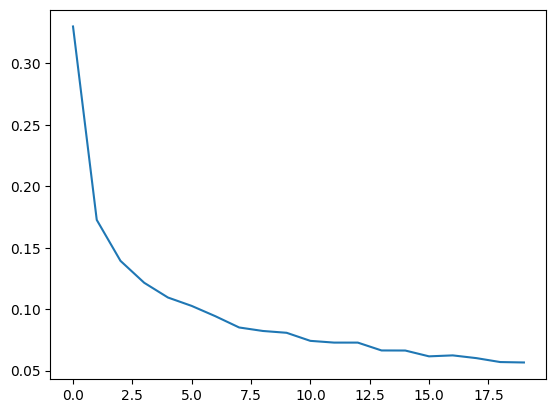

In [18]:
# Capture the losses over time for plotting
losses = []
# Number of training epochs to perform
epochs = 20

# Initialize a new run to capture this train/test cycle
run = wandb.init(
    project="Hancock",
    name="First Hancock Model",
    config={
        "dataset": "MNIST",
        "learning_rate": 0.003,
        "optimizer": "Adam",
        "epochs": epochs,
    },
)

# Indicate that we'll use the MNIST training and test sets created above
run.use_artifact("MNIST:latest")

# Set the device to run on: GPU, MPS, or CPU
device = torch.device(
    "cpu")
#     if torch.cuda.is_available()
#     else "mps"
#     if torch.backends.mps.is_available()
#     else "cpu"
# )
print(f"Using {device} device")
model = model.to(device)

for e in range(epochs):
    total_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784-dimensional vector
        images = images.view(images.shape[0], -1)
        # Convert input to device
        images = images.to(device)

        # Forward-propagation through the model to get predictions
        predictions = model(images)

        # Calculate the loss
        loss = loss_fn(predictions, labels)

        # Log the loss to Weights and Biases
        wandb.log({"training_loss": loss})

        # Reset the _gradients_ for all of the model parameters
        # so that only the current batch is used to update them.
        optimizer.zero_grad()

        # Perform backpropagation
        loss.backward()

        # Update the learning rate
        optimizer.step()

        # Capture the loss for this batch
        total_loss += loss.item()

    epoch_loss = total_loss / len(trainloader)
    print(f"Epoch: {e+1},\tTraining loss: {epoch_loss}")
    losses.append(epoch_loss)

plt.plot(losses)
plt.show()

<details><summary>Solution:</summary>

```py
for e in range(epochs):
    total_loss = 0
    i = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784-dimensional vector
        images = images.view(images.shape[0], -1).to(device)
        labels = labels.to(device)

        # Forward-propagation through the model to get predictions
        predictions = model(images)

        # Calculate the loss
        loss = loss_fn(predictions, labels)

        #...
```

</details>


Congratulations! You have designed and trained a neural network from scratch.

- Note how the losses decreased with each epoch but we reached a point of diminishing returns.


## Testing


Testing the performance of our trained model is a crucial step, and the reason we set aside 14% of the dataset in `testloader`

- The following code runs inside of a `torch.no_grad` block, which will turn of gradient calculations (unnecessary during inference) to save memory.
- [ ] Note that use of `torch.max()`
  - We are telling PyTorch to find the maximum value in the outputs tensor, along its first dimension
  - However, we are not interested in the value itself (`_`) as it will just be some probability value
  - We are interested in the _index_ of the max value, `predicted`, which will tell us which digit is in the input image.


In [19]:
with torch.no_grad():  # Temporarily turn off gradient calculation for prediction
    # images will be a collection containing a single image
    for i, (images, labels) in enumerate(testloader):
        images = images.view(images.shape[0], -1).to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        print(f"Predicted: {predicted[0]}, Actual: {labels[0]}")

Predicted: 2, Actual: 2
Predicted: 0, Actual: 0
Predicted: 7, Actual: 7
Predicted: 2, Actual: 2
Predicted: 6, Actual: 6
Predicted: 9, Actual: 9
Predicted: 4, Actual: 4
Predicted: 9, Actual: 9
Predicted: 3, Actual: 3
Predicted: 9, Actual: 9


Once the cell above is run, we can see a collection of 10 guesses.


Let's end with a full inference run across the entire test set. We will use this to generate an accuracy score.

- [ ] Copy the code above into the following cell, and edit it to remove the break after 10 images.
- [ ] Initialize a variable, `correct_count`, to count the number of correct guesses.
- [ ] Instead of printing values, update `correct_count` based on whether the prediction matched the label.
- [ ] Compute and print a variable `accuracy` which can be computed as a percentage of correct guess, divided by `len(testloader)`


In [22]:
with torch.no_grad():
    correct = 0
    for i, (images, labels) in enumerate(testloader):
        images = images.view(images.shape[0], -1).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        # Use softmax function to get predicted probability from outputs
        predicted_prob = nn.functional.softmax(outputs)[
            range(outputs.shape[0]), predicted
        ]

        # compute the accuracy of the model
        correct += (predicted == labels.to(device)).sum().item() / labels.shape[0]

        # add test example to test_preds_table
        # Initialize wandb table for test predictions if not already done
        if not hasattr(wandb, 'test_preds_table'):
            wandb.test_preds_table = wandb.Table(columns=["id", "predicted_prob", "predicted", "actual"])
        
        # Add data to the table
        # Add data to wandb table with explanation of softmax outputs:
        # predicted_prob[0] is the probability (0-1) of the predicted class after softmax
        # softmax converts raw model outputs (logits) into probabilities that sum to 1
        # higher probability means model is more confident in its prediction
        
        wandb.test_preds_table.add_data(
            i, predicted_prob[0].item(), predicted[0].item(), labels[0].item()
        )

    accuracy = correct / len(testloader)
    print(f"Accuracy: {accuracy*100}%")
    wandb.log({"test_accuracy": accuracy})


/var/folders/91/bcl7bj6n2fqf9j03fdhyl02c0000gn/T/ipykernel_81543/3428332228.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  predicted_prob = nn.functional.softmax(outputs)[


Accuracy: 97.17356687898089%


<details><summary>Solution:</summary>

```py
with torch.no_grad():
    correct = 0
    for i, (images, labels) in enumerate(testloader):
        images = images.view(images.shape[0], -1).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        # Use softmax function to get predicted probability from outputs
        predicted_prob = nn.functional.softmax(outputs)[
            range(outputs.shape[0]), predicted
        ]

        # compute the accuracy of the model
        correct += (predicted == labels.to(device)).sum().item() / labels.shape[0]

        # add test example to test_preds_table
        test_preds_table.add_data(
            i, predicted_prob, predicted[0], labels[0]
        )

    accuracy = correct / len(testloader)
    print(f"Accuracy: {accuracy*100}%")
    wandb.log({"test_accuracy": accuracy})
```

</details>


You should see an accuracy of around 96.64%.

- [ ] Change the number of training epochs to 1 and re-run the cells above to retrain and retest your models. What effect does it have?
  - [ ] Try 25 epochs
  - Remember, too many epochs can have diminishing returns or even overfit your model.


## Exporting the model and Inference


Now that we have a trained model, let's export it for use elsewhere e.g. a digit-guessing app's server.

- [ ] Run the cell below to save the model to the specified path
- [ ] [Optional] Write a Python script to load the model and perform inference for a given image.
  - [Relevant PyTorch docs](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)


In [23]:
torch.save(model, "./downloads/mnist.pth")

# save to Weights nad Biases
model_artifact = wandb.Artifact(name="MNIST_classifier", type="model")
model_artifact.add_file("./downloads/mnist.pth")
run.log_artifact(model_artifact)
wandb.finish()

test_accuracy,▁▁
training_loss,█▆█▅▅▂▃▃▃▅▂▅▂▃▃▂▃▁▁▄▇▁▂▂▁▃▃▁▁▂▁▂▂▁▁▁▁▁▂▂
test_accuracy,0.97174
training_loss,0.04912


### 🚦 Checkpoint: Stop

- [ ] Uncomment this code
- [ ] Complete the feedback form
- [ ] Run the cell to log your responses and record your stop time:

In [26]:
deep_atlas.log_feedback(
    {
        # How long were you actively focused on this section? (HH:MM)
        "active_time": "This section was an ENORMOUS pain in the ass for me to do because my version in python didn't have the nz? package? Jesus helped me out, but we had to uninstall and reinstall python to fix it.",
        # Did you feel finished with this section (Yes/No):
        "finished": "yes",
        # How much did you enjoy this section? (1–5)
        "enjoyment": 3,
        # How useful was this section? (1–5)
        "usefulness": 5,
        # Did you skip any steps?
        "skipped_steps": "no",
        # Any obvious opportunities for improvement?
        "suggestions": "help other people not deal with the same dependecy error",
    }
)
deep_atlas.log_stop_time()

NameError: name 'deep_atlas' is not defined

## You did it!


In this exercise, we explored how to load a dataset, set up a Deep Neural Network model in PyTorch, train and validate the model parameters and export it for use elsewhere.

PyTorch offers many APIs for customizing the structure or a model, some of which we will explore in the future. You may even come across and prefer versions of its API for Class-based definitions or APIs that support functional programming. Whichever API you choose, the concepts covered in this exercise will be relevant:

- Sourcing and splitting training and testing data
- Choosing layer types
- Choosing a loss function
- Running forward and backpropagation to train parameters
- Saving and loading models for inference


### Resources:


- [PyTorch: nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear)
- [List of PyTorch's Activation Layer Types](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)
- [List of PyTorch's Loss Functions](https://pytorch.org/docs/stable/nn.html#loss-functions)
  - [CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss)
